### What is single-cell sequencing?
Single-cell sequencing examines the nucleic acid sequence information from individual cells with optimized next-generation sequencing technologies, providing a higher resolution of cellular differences and a better understanding of the function of an individual cell in the context of its microenvironment.

### Benefits of using single-cell sequencing
Single-cell sequencing has several advantages, including:

1. **High Resolution:** Enables the study of individual cells, providing a detailed understanding of cellular heterogeneity within a population.

2. **Precise Insights:** Unravels rare cell types or subpopulations that might be overlooked in traditional bulk sequencing methods.

3. **Accurate Profiling:** Allows for accurate characterization of cellular functions, gene expression, and genetic variations at the single-cell level.

4. **Dynamic Processes:** Captures dynamic changes within a cell population, providing insights into cellular transitions and responses over time.

5. **Clinical Relevance:** Has potential applications in personalized medicine, diagnostics, and understanding disease mechanisms at the individual cell level.

6. **Reduced Averaging Effects:** Eliminates the averaging effects seen in bulk sequencing, providing a clearer picture of the diverse molecular landscape within a sample.

7. **Cellular Heterogeneity:** Facilitates the identification of subtle differences between seemingly similar cells, enhancing our understanding of complex biological systems.

8. **Discovery of Novel Biomarkers:** Unveils new biomarkers and therapeutic targets by uncovering variations in gene expression and genomic profiles within individual cells.


### Difference between bulk and single-cell sequencing

**Table: Bulk Sequencing vs. Single-Cell Sequencing**

| Aspect                            | Bulk Sequencing                                       | Single-Cell Sequencing                                |
|-----------------------------------|-------------------------------------------------------|-------------------------------------------------------|
| **Resolution**                    | Provides an average from a population of cells         | Captures information at the individual cell level      |
| **Heterogeneity**                  | Masks cellular heterogeneity                           | Reveals cellular diversity and rare cell types         |
| **Insights into Rare Cells**      | May miss rare cells or variations                      | Enables detection and analysis of rare cells           |
| **Dynamic Processes**             | Provides a static snapshot of the entire population    | Captures dynamic changes, tracking cellular responses  |
| **Clinical Applications**         | General profiling in large populations                | Applicable to personalized medicine and diagnostics    |

**Chart: Bulk vs. Single-Cell Sequencing**

```plaintext
 100% 
  90% 
  80%                         Bulk Sequencing
  70% 
  60% 
  50% 
  40%                                   Single-Cell Sequencing
  30% 
  20% 
  10% 
   0% 
```

In the chart, you can visualize the emphasis on individual cell resolution in single-cell sequencing compared to the averaged representation in bulk sequencing. This graphical representation helps highlight the differences between the two methods.


# The Process of Single-cell Sequnecing
Single-cell sequencing is a powerful technique used in genomics to study individual cells, providing insights into the genetic information of each cell in a complex biological sample. Here's a simplified explanation of the process:

1. **Cell Isolation:**
   - Start by collecting a sample of cells from the organism or tissue you're studying. This could be blood, tissue, or any other type of sample.

2. **Single-Cell Capture:**
   - To study individual cells, you need to isolate them from the rest of the sample. This can be done using various techniques, such as microfluidics or droplet-based methods, to capture and separate each cell.

3. **Cell Lysis:**
   - Once you have isolated individual cells, you break open (lyse) each cell to release its genetic material (DNA or RNA). This step is essential to access the genetic information inside the cell.

4. **Amplification:**
   - The genetic material (DNA or RNA) from a single cell is typically very small, so it needs to be amplified or copied to generate enough material for analysis. Polymerase chain reaction (PCR) is often used for this purpose.

5. **Library Preparation:**
   - The amplified genetic material is then prepared as a library. This involves tagging the genetic material with unique identifiers, allowing you to trace it back to the individual cell it came from during analysis.

6. **Sequencing:**
   - The prepared libraries are then subjected to high-throughput sequencing machines. These machines read the genetic code of each DNA or RNA fragment, providing a massive amount of data.

7. **Data Analysis:**
   - The sequencing data is then analyzed computationally. Bioinformatic tools help interpret the data, identifying genes that are active or inactive in each individual cell. Researchers can gain insights into the diversity of cell types, gene expression patterns, and potential differences between cells.

8. **Biological Insights:**
   - Finally, the results of single-cell sequencing provide a detailed understanding of the heterogeneity within a population of cells. Researchers can discover rare cell types, identify changes in gene expression under different conditions, and gain insights into various biological processes.

Single-cell sequencing has revolutionized our ability to study cellular diversity, understand complex biological systems, and uncover new insights into health and disease. It allows scientists to go beyond average measurements and examine the specific characteristics of individual cells within a population.

### Preparation

In [5]:
# import the libraries
import numpy as np # linear algebra, matrix manipulation
import scanpy as sc # computational biology
import pandas as pd # data analysis
import os # for managing file system
import anndata # for analyzing the h5ad file type
import warnings # manipulating warnings
import plotly.express as px # plotly for interactive visualization

In [6]:
# Suppress all warnings
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi = 80, facecolor='white')

scanpy==1.9.6 anndata==0.10.4 umap==0.5.5 numpy==1.24.1 scipy==1.11.4 pandas==2.1.4 scikit-learn==1.3.2 statsmodels==0.14.1 pynndescent==0.5.11


In [7]:
results_file = 'write/pbmc3k.h5ad'  # the file that will store the analysis results

In [8]:
adata = sc.read_10x_mtx(
    'data/filtered_gene_bc_matrices/hg19/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)

... reading from cache file cache\data-filtered_gene_bc_matrices-hg19-matrix.h5ad


c:\Users\Farhan\AppData\Local\Programs\Python\Python310\lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [9]:
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

In [10]:
adata  # testing the input of the files

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

### Preprocessing

normalizing counts per cell
    finished (0:00:00)


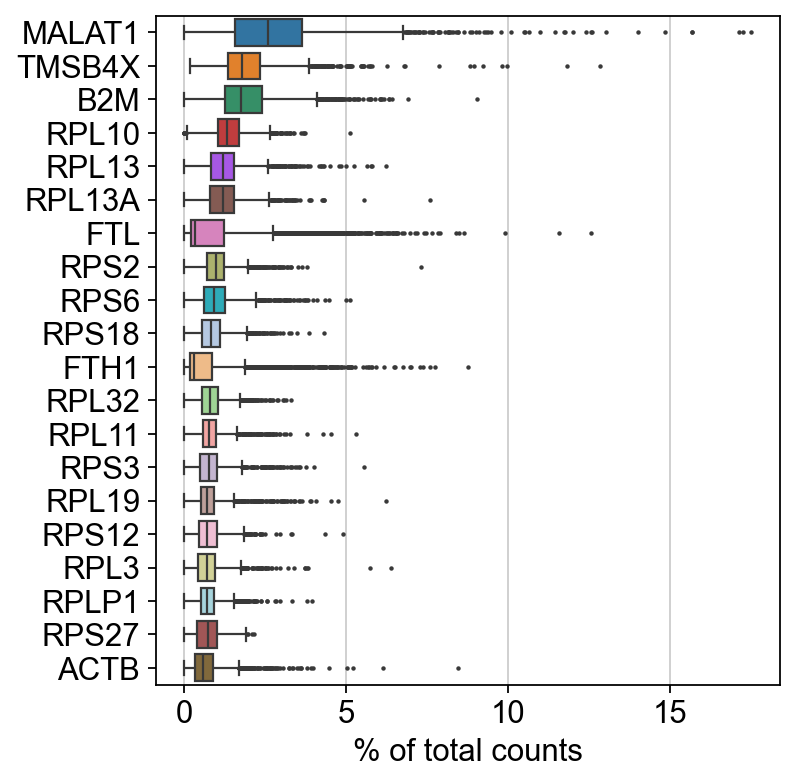

In [11]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [12]:
# Filtering based on cells and genes
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 19024 genes that are detected in less than 3 cells


In [13]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [14]:
adata

AnnData object with n_obs × n_vars = 2700 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

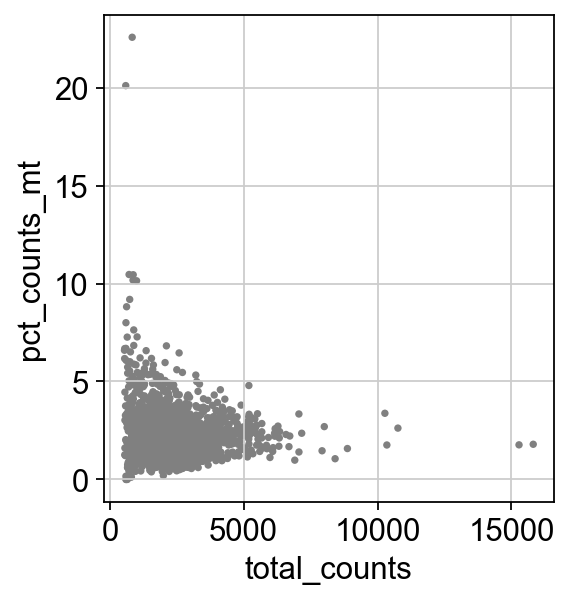

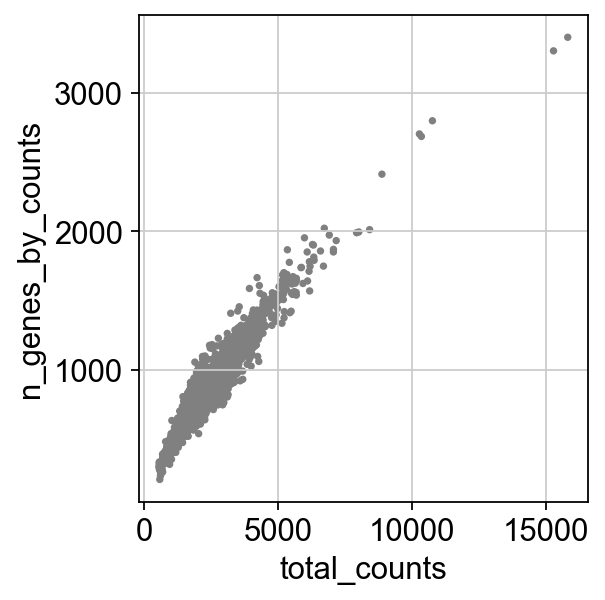

In [15]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [16]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [17]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


c:\Users\Farhan\AppData\Local\Programs\Python\Python310\lib\site-packages\scanpy\preprocessing\_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [18]:
sc.pp.log1p(adata)

In [19]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes


c:\Users\Farhan\AppData\Local\Programs\Python\Python310\lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


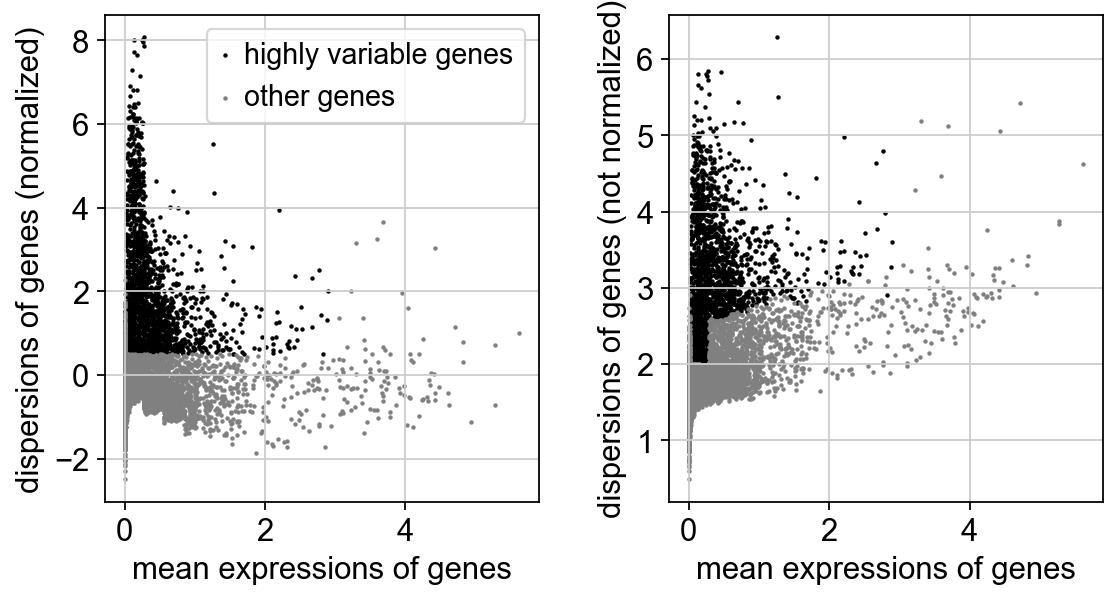

In [20]:
sc.pl.highly_variable_genes(adata)

In [21]:
adata.raw = adata

In [22]:
adata = adata[:, adata.var.highly_variable]

In [23]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:39)


In [24]:
sc.pp.scale(adata, max_value=10)